In [1]:
using Revise
using NonEqDigits

In [2]:
using GLMakie
using CairoMakie
using JLD2
using Geppetto

In [3]:
includet("../scripts/ma_graphviz.jl")

In [4]:
includet("../scripts/ma_colors.jl")
single_col_width = 324 # corresponds to 3+3/8 in as state in PR guidelines
double_col_width = single_col_width*2
golden_ratio = 1.618
nothing

# Graphviz

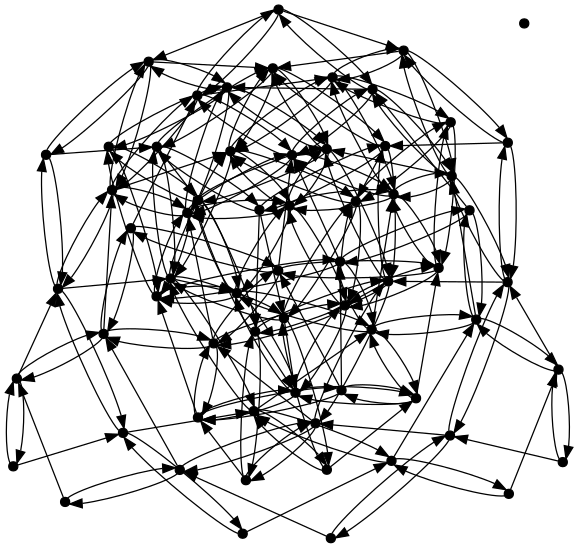

In [7]:
ma = MolAut(6, 62;
    # reduced=true
)
g = molaut_gv(ma;
    simple_nodes=true,
    # highlight_acs=true,
    dim_nonacs="lightgray",
    # edge_colormap=:Greens
    
    # cluster=true,
    
    layout="neato",
    # dim="3",
    # dimen="3",
    # mode="KK",
    # epsilon="0.000001",
    # maxiter="10000000",
    # scale="2",
    
    ranksep="1",
    size="6"
)

In [620]:
GraphvizDotLang.save(g, "../data/figures/gv_sample_networks/" * randname() * ".pdf"; format="pdf")

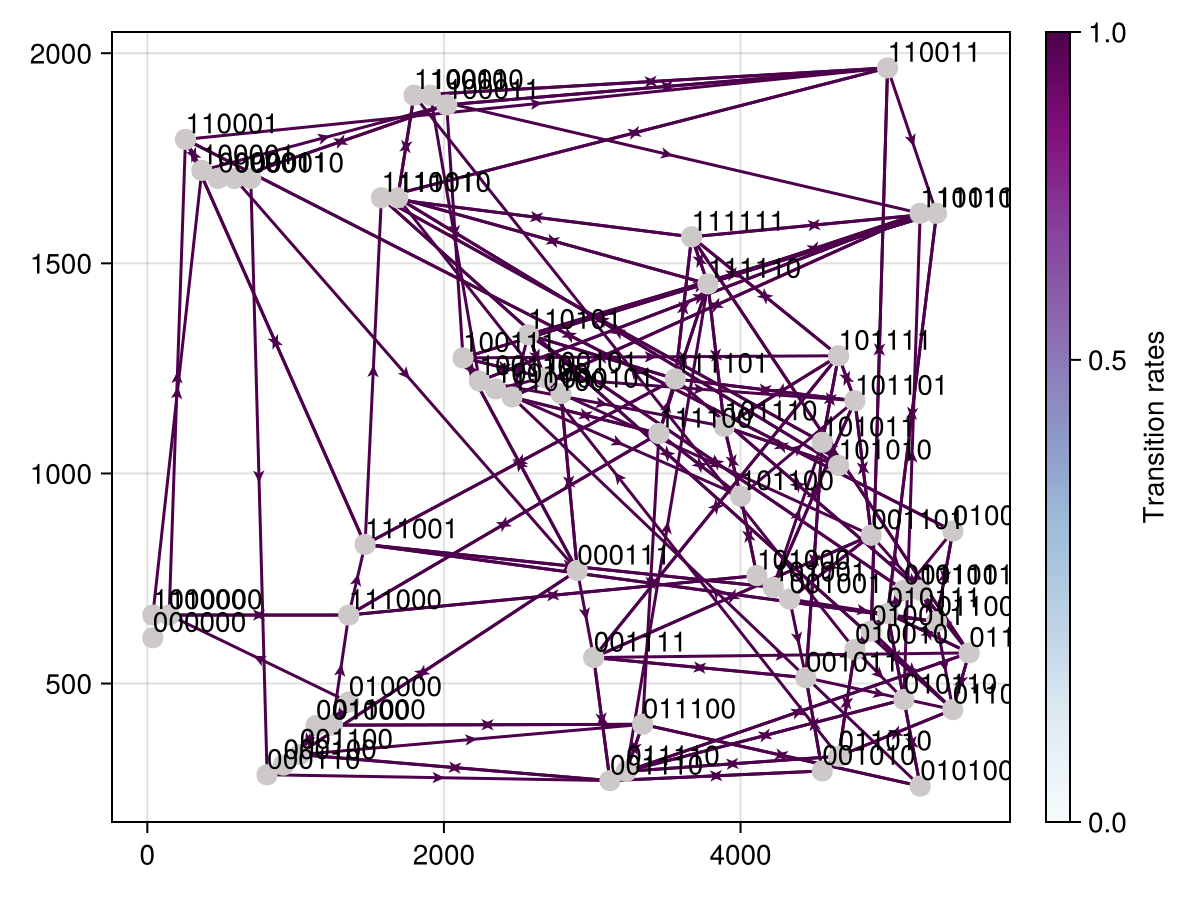

In [14]:
layout = get_gv_layout_positions(ma;
    # cluster=true,
)

faa = plotgm(ma;
    layout,
)
# display(GLMakie.Screen(), faa.figure)

# GraphMakie

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweighteddigraph.jl:170


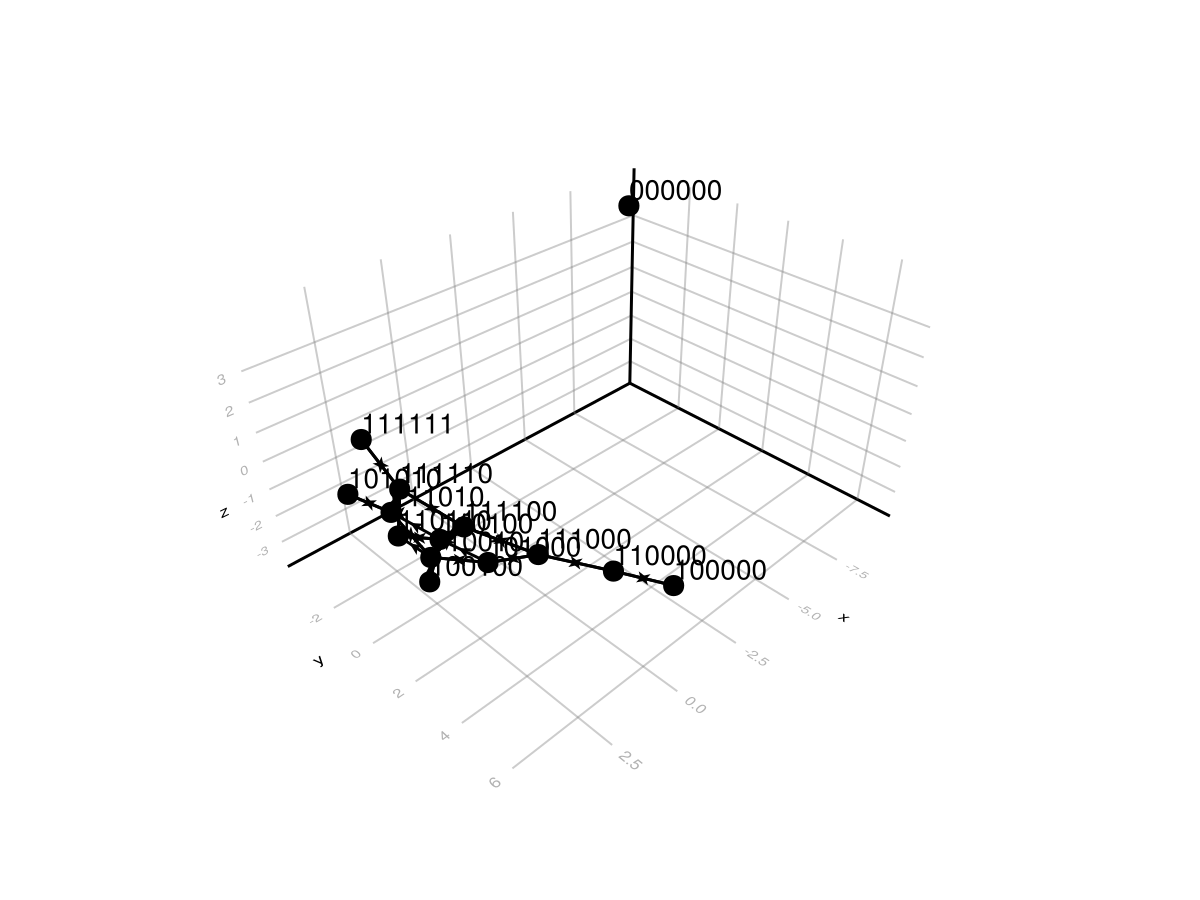

In [5]:
ma = MolAut(6, 62;
    reduced=true
)
faa = plotgm(ma;
    layout=Spring(dim=3),
    # flabels=false,
    get_ac_coloring_kwargs(ma; hcolor=:black, bcolor=:snow3)...
)
# display(GLMakie.Screen(), faa.figure)
faa

# Pyvis

In [643]:
using PythonCall
pv = pyimport("pyvis")
nx = pyimport("networkx")

Python: <module 'networkx' from '/home/honza/UCLOneDrive/Projects/TopoStochSim/.CondaPkg/.pixi/envs/default/lib/python3.12/site-packages/networkx/__init__.py'>

In [655]:
function to_pyvis(ma)
    mg = ma.mg
    
    pvn = pv.network.Network(notebook=true)

    for l in labels(mg)
        pvn.add_node(code_for(mg, l); label=mg[l])
    end

    for (s, d) in edge_labels(mg)
        pvn.add_edge(code_for(mg, s), code_for(mg, d);
            weight=mg[s,d]
        )
    end

    pvn
end
xx = to_pyvis(ma)
xx.show("example.html")

Python: <IPython.lib.display.IFrame object at 0x7eff6fb0ce30>

# Bits and bobs

In [3]:
GC.gc()
empty!(Out)
GC.gc()